# Synthetic Observations Generator

## Author
- **Name**: Azimov Sherkhon Azizkhon Ugli
- **Email**: sherkhonazim@gmail.com
- **GitHub**: @AzimovSherkhon
  
- Purpose: Generates synthetic observations for nonlinear filtering using an SDE with a double-well potential model
### Parameters:
- Noise Strength: 0.5
- Initial State: 0.0
- Observation Noise: 0.2
- Observation Frequency: 1 time unit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(150)

def drift(state):
    return 4 * state - 4 * state**3

def simulate_sde(noise_strength, final_time, time_step, initial_state):
    steps = int(final_time / time_step)
    trajectory = np.zeros(steps)
    trajectory[0] = initial_state
    noise = np.random.normal(0, np.sqrt(time_step), size=steps)
    for i in range(1, steps):
        trajectory[i] = trajectory[i-1] + drift(trajectory[i-1]) * time_step + noise_strength * noise[i-1]
    return trajectory

def generate_observations(true_trajectory, obs_noise_std, obs_frequency, time_step):
    total_steps = len(true_trajectory)
    obs_indices = np.arange(0, total_steps, obs_frequency)
    observations = true_trajectory[obs_indices] + np.random.normal(0, obs_noise_std, size=len(obs_indices))
    observation_times = obs_indices * time_step
    return observations, observation_times

In [2]:
final_time = 100
time_step = 0.01
initial_state = 0.0
noise_strength = 0.5
true_trajectory = simulate_sde(noise_strength, final_time, time_step, initial_state)
time_coords = np.linspace(0, final_time, len(true_trajectory))

obs_noise_std = 0.2
obs_frequency = 100
observations, observation_times = generate_observations(true_trajectory, obs_noise_std, obs_frequency, time_step)

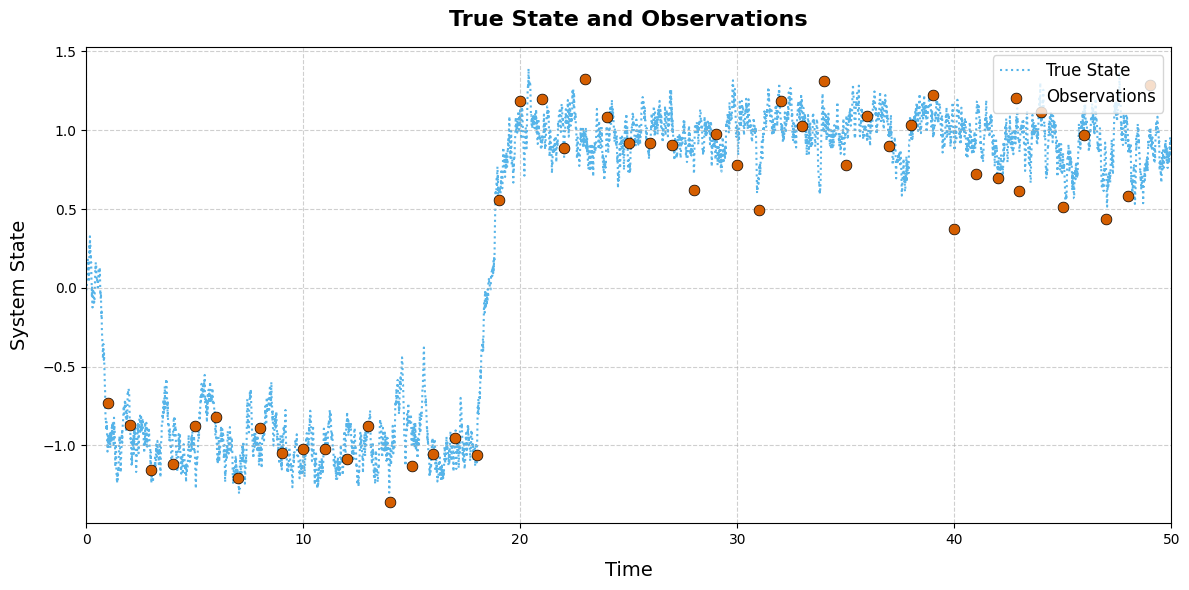

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(time_coords[:5000], true_trajectory[:5000], label="True State", color="#56B4E9", linestyle=":", linewidth=1.5, zorder=1)
plt.scatter(observation_times[1:50], observations[1:50], label="Observations", color="#D55E00", marker="o", s=60, edgecolors="black", linewidths=0.5, zorder=2)

plt.xlabel("Time", fontsize=14, labelpad=10)
plt.ylabel("System State", fontsize=14, labelpad=10)
plt.title("True State and Observations", fontsize=16, fontweight="bold", pad=15)
plt.legend(fontsize=12, loc="upper right", frameon=True)
plt.xlim(0, 50)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig("true_state_observations.png", dpi=300, bbox_inches="tight")
plt.show()

In [4]:
np.save("true_trajectory_k_0.5_1.npy", true_trajectory)
np.save("Obs_doublewell_k=0.5.npy", observations)
np.save("Obs_time_doublewell_k=0.5.npy", observation_times)